In [2]:
%matplotlib inline
from scipy.stats import rv_continuous
import numpy as np
import os
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy import integrate
import matplotlib.pyplot as plt
import capLib as ca
import fdulib as vdf
import sys


# Report Stage

## 1. Halo to Sun
### 1.1 Capture 
(Press and Spergel, 1985. Andrew Gould, 1987)

In [3]:
%%latex
Regarding the problem of the Sun, or the earth, capturing Wimps while moving within the Dark Matter halo, one have to establish first the two frames of reference, one for the halo assumed fixed, and other for the Sun that rotates around the Galactic Center with a velocity $v_{sun}$. 


Now if we place ourselves in the Sun frame of reference and consider the
Wimps of the halo with velocity $\vec{u}$ and a velocity distribution
funcition $f(\vec{u})$ with respect to the Sun.
Also this WIMPs are at a distance R large enough to render the gravitaitonal
field of the Sun negligible.
Thus the number of Wimps per unit spatial volume with speed between $u$ and $u+du$ 
will be
\begin{equation}
d{N_{W}}=f(u)\,d{u}
\end{equation}

Now considering a unit surface element of the sphere of radius R centered at the Sun.
The spatial number density of WIMPs with speed between $u$ and $u+du$ and entering to the
surface at an angle from the normal between $\theta$ and $\theta +d\theta$ 

\begin{equation}
d{\rho_{W}}=\frac{1}{2} \,f(u)\,d{u}\,d{\cos{\theta}}
\end{equation}

And finally, and taking into account that 
$\cos{\theta}\,d{\cos{\theta}}=\frac{1}{2}d{\cos{}^2\theta}$
. Then the flux , F, of WIMPs through the surface element is 
\begin{equation}
d{F_{W}}=\frac{1}{4} \,f(u)\,u\,d{u}\,d{cos^2\theta}
\end{equation}

<IPython.core.display.Latex object>

In [4]:
%%latex
We can now make a variable change to the angula momentum $J$ in the following way
\begin{equation}
\vec{J}=\vec{r} \times  \vec{p}
\end{equation}
\begin{equation}
|\vec{J}|=|\vec{r}||\vec{p}| \sin{\theta}
\end{equation}
then per unit mass and relaxing a bit the notation
\begin{equation}
J= R u \sin{\theta}
\end{equation}
here the radius R of the previously defined sphere and $u=|\vec{u}|$
we can then get 

\begin{equation}
 d{J^2}= (-) R^2 u^2 d{\cos{}^2{\theta}}
\end{equation} 

The Flux in terms of the angular momentum will now be
\begin{equation}
\label{unitflux}
d{F_W}=\frac{1}{4} \,f(u)\,u\,d{u}\,\frac{d{J^2}}{R^2u^2}
\end{equation}

So the flux of WIMPs through the whole surface will be the expression
\ref{unitflux} multipied by $4\pi R^2$ resulting in

\begin{equation}
d{F_W}=\pi \,\frac{f(u)}{u}d{u}\,d{J^2}
\end{equation}

<IPython.core.display.Latex object>

In [5]:
%%latex
Now  a WIMP that had initially a velocity $\vec{u}$ at infinity when it
reaches the solar surface will have a velocity $\vec{w}$. And so,
the probability of a WIMP with a velocity $\vec{w}$ of getting captured
in the solar gravitational field, by interacting inside and loosing enought
energy during the interaction to endup unable to escape from the Sun will 
be defined as

\begin{equation}
P=\Omega_v(w)\frac{d{l}}{w}
\end{equation}

where$d{l}/w$ is the time that the WIMP spends in a shell of radious r,
the Sun radius or smaller in this case, and is defined as
\begin{equation}
\frac{d{l}}{w} = \frac{1}{w}\left[1- \frac{J^2}{(rw)^2}\right]2\Theta{(rw-J)}\,d{r}
\end{equation}

The two heaviside functions acount for the fact that the WIMP intersect the shell twice
or not at all depending on whether or not $rw$ is greater than the angular momentum.

<IPython.core.display.Latex object>

In [6]:
%%latex
So the complete capture rate per shell volume $\frac{d{C}}{d{r}}$ will
be the flux of WIMPs inward at infinity times the probability of it being captured
by the Sun integrated over all angular momentum. i. e:
\begin{equation}
d{C} = 2\,\pi \frac{f(u)}{u} \, d{u} \frac{1}{2} \Omega_v(w) \, \frac{d{l}}{w} d{J^2}d{r}
\end{equation}

 So the integral to solve will be

\begin{equation}
d{C}=2\,\pi \, d{r}\,\displaystyle\int \frac{f(u)}{u} d{u}\,  \Omega_v(w) \, \frac{\Theta{(rw-J)}}
{w\left(1-\left(\frac{J}{rw}\right)^2\right)^{1/2}} d{J^2}
\end{equation}

or more specifically 

\begin{equation}
d{C}=2\,\pi \,d{r}\, \frac{f(u)}{u} d{u}\,\frac{\Omega_v(w)}{w} \displaystyle\int_0 ^{\infty}   \, \frac{\Theta{(rw-J)}}
{\left(1-\left(\frac{J}{rw}\right)^2\right)^{1/2}} d{J^2}
\end{equation}

and the result is given by
\begin{equation}
d{C}=2\,\pi \,d{r} \frac{f(u)}{u} d{u}\,\frac{\Omega_v(w)}{w} 2(rw)^2 
\end{equation}
So having $d{V}=4\pi r^2 d{r}$ in the mix we get the capture per volume as

\begin{equation}
\label{GouldCapture}
\frac{d{C}}{d{V}}= \int \frac{f(u)}{u}\,w\Omega_v(w)du
\end{equation}

At this point it is important to remind that $w^2= u^2 + v_{esc}^2$ where $v_{esc}$ is the escape velocity of the WIMPs in the Sun.

<IPython.core.display.Latex object>

## 1.2 halo 


In [7]:

%%latex
Now that we have established a formalism of what is necessary to understand in order
to study WIMP capture by the Sun. We need now to  work a bit more in detail the diferent
dark or grey areas that could lead to misleading assumptions when making this type of
calculations. As seen in equation \ref{GouldCapture} the capture probabilty $\Omega_v(w)$  and
the velocity distribution function $f(u)$ could be subjects to different physical assumption.
And whether this assuptions are realistic or not isn't an easy task to carry on.

The first one we are going to adress is the Dark Matter Halo velocity distribution function. 
This part of the calculation is in the spectrum of Astrophysisc and has a grat deal of discussion
arround. Different models have been proposed either from theoretical procedures or from fits 
on large cosmological simulation data. In this section some models are going to be presented and this 
models will be compared in the following sections.




<IPython.core.display.Latex object>

In [8]:
%%latex
the velocity distribution function describes the local Dark Matter velocity distribution in the galactic disc with a galactic radius between 7 and 9 kpc.
In the Halo frame of reference is regarded as $f(\vec{v})$ and to obtain the distribution of the modulus instead of the vector distributibution is necessary to carry on a coordinate change in spherical coordintas in the following way.

\begin{equation}
\int f(\vec{v})\,d^3{v}=2\,\pi \int f(v) v^2d{v}
\end{equation}

The most commonly used assumpsion to describe the velocity distribution function in the literature is a maxwellian distribution that result if we consider the Dark Matter halo as isothermal.
This maxwellian distribution can be defined by

\begin{equation}
f(\vec{v})= \frac{1}{N} e^{\vec{v}^2 / v_0^2}
\end{equation}
where $N$ is a normalization factor and $v_0$ de dispertion velocity. This distribution has a interesting feature and it is that it can be constructed by making a produc of three gaussians representing the distriburions of the three components of $\vec{v}$, this allows to study the effect of a non-isotropic halo on the capture of WIMP as will be shown bellow.


Alternative assumptions to adress $f(v)$ could be obtained either from simulations or from theoretical method, among the proposed distributions obtained from simulation in this document two main ones will be analized. Those are the ditribution presented by Tsallis as a generalization of the Boltzmann-Gibbs entropy to non-extensive systems \cite{Tsallis} that results in a distribution of the form

\begin{equation}
f(\vec{v}) = \frac{1}{N}\left(1-(1-q)\frac{\vec{v}^2}{v_0 ^2}\right)^{\frac{q}{(1-q)}}
\end{equation}

Where N is a normalization constant. A Maxwell-Boltzmann distribution is recoverd when $q\to 1$.

And the other distribution that will used is the one presented by Mao \cite{mao} obtained as an empirical function from fits on several cosmological simulations on diferent sizes.
The resulting function is

\begin{equation}
f(\vec{v}) = \frac{1}{N} \exp{\left(v_{esc}^2 - |\vec{v}|^2\right)^p} \Theta(v_{esc} - |\vec{v}|)
\end{equation}

<IPython.core.display.Latex object>

In [9]:
%%latex
The different distribution functions present features that differs from the usual assumption, the maxwellian distribution.
For example the Maxwellian distribution is said to be over populated in the high velocity tail of the distribution leading to overly optimistic limits for Dark Matter direct detection experiment.
This situation is clearly diferent in the case o both the Mao empirical expression and the Tsallis distribution. As seen in the figure \ref{distriburions} 

<IPython.core.display.Latex object>

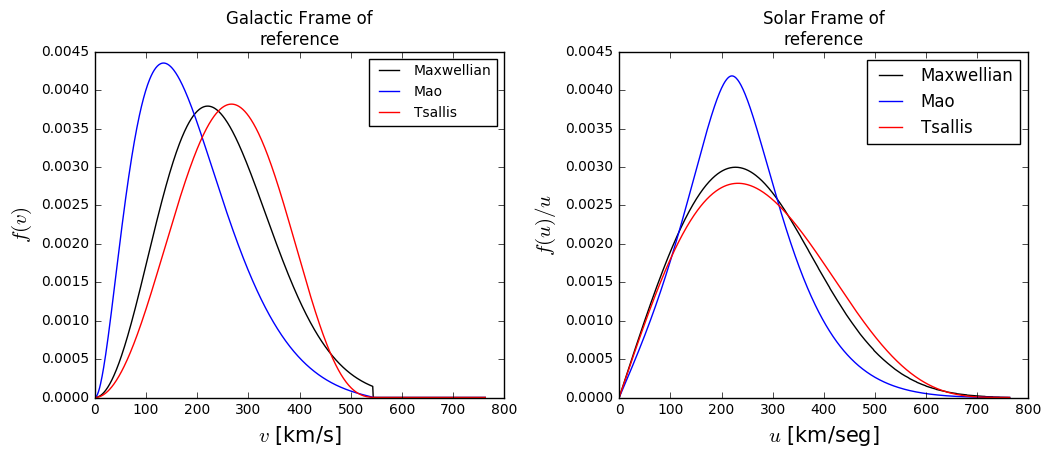

In [29]:
v_Sun = 220.
v_esc = 544.
#
x = [i for i in np.arange(0.1,v_Sun+v_esc)]
n1= vdf.get_n(vdf.shm_gal)
n2= vdf.get_n(vdf.mao_gal)
n3= vdf.get_n(vdf.lin_gal)
labelsize=15
fig0 ,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[10,4])

plt.tight_layout(pad=1, w_pad=5.5, h_pad=1.0)
ax0.set_title('Galactic Frame of\nreference')
ax0.set_ylabel(r'$f(v)$', fontsize=labelsize)
ax0.set_xlabel(r'$v$ [km/s]', fontsize=labelsize)
ax0.plot(x, map(vdf.shm_gal, x),'k-', label ='Maxwellian')
ax0.plot(x, map(vdf.mao_gal,x),'b-',label='Mao')
ax0.plot(x, map(vdf.lin_gal,x),'r-', label='Tsallis' )
legend0 = ax0.legend(loc='upper right', ncol=1, shadow=False, fontsize=10)
frame = legend0.get_frame()
sun=np.vectorize(vdf.gal_to_sun)

SHM_sun = sun(x,vdf.shm_gal)*n1
MAO_sun = sun(x,vdf.mao_gal)*n2
LIN_sun = sun(x,vdf.lin_gal)*n3

ax1.set_title('Solar Frame of\nreference')
ax1.set_ylabel(r'$f(u)/u$', fontsize=labelsize)
ax1.set_xlabel(r'$u$ [km/seg]', fontsize=labelsize)
ax1.plot(x, sun(x,vdf.shm_gal)*n1,'k-', label='Maxwellian')
ax1.plot(x, sun(x,vdf.mao_gal)*n2, 'b-',label='Mao')
ax1.plot(x, sun(x,vdf.lin_gal)*n3, 'r-',label='Tsallis')
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()
#fig0.tight_layout()


In [11]:
%%latex
 This figure also shows the velocity distributions in the Sola frame of reference. Then in orther to get the velocity distribution function in the Solar frame or reference the procedure is as following way:

\begin{equation}
f(u)=\int_{-1}^1 f(\sqrt{v^2+v_{\odot}^2+2\,v\,v_{\odot}cos{\theta}})\,d{\cos{\theta}}
\end{equation}

Here $v_{\odot}$ is the modulus of the Sun's velocity arroun the galactic center.
And in what respect to this Documente $\vec{u}$ is the WIMPs velocity in the Solar frame of reference

<IPython.core.display.Latex object>

## 1.3 Maxwellian distribution and its anisotropies
(Fornengo and Scopel 2008)

In [12]:
%%latex
Before adressing the full capture calculetion as presented above an analysis on the Maxwellian distribuion is going to be presented. 
This analysis is presented by Fornengo and Scopel in 2008 \cite{fornengo}. 
The Maxwellian distribution can be obtained from the product of three gaussian distributions.
Gaussian distribution: 
\begin{equation}
f_G(vi)=f_{gaussian}(v_i)=\frac{1}{\sqrt(2\pi\sigma_i^2)} \exp{-\frac{v_i^2}{2\sigma_i}}
\end{equation}
so to get the cuantity $I(v_{min},t)$ wich is proportional to the direct detection differential rate $dR/dE_R$ we do the integral:

\begin{equation}
I(v_{min},t)= \int_{v_{min}}^{v_{esc}} \frac{f_G(w_x)f_G(w_z)f_G(w_z)}{w} d\vec{w}
\end{equation}

in the case where $\sigma_x = \sigma_y =\sigma_z= \sigma$ the Maxwellian distribution is recovered. There is a modulation on the capture rate through out the year on the value of $I(v_{min},t)$ and by changing the lower limit of the integral
the modulation will also change. But in the case where the gaussian disributions are not equal, the halo is no isotropic, the modulation will show changes in diferent areas depending on the values of the sigmas.

<IPython.core.display.Latex object>

In [13]:
### some functions ####
from numpy import radians as rad
## constants to be used ###
u_e = 29.79 # km/s fornengo 
e = 0.016722
lambda0 = rad(13.) # degrees
w = 2. * np.pi / 365.
v_0 = 220.
sigma = sqrt(3* (v_0**2) / 2)
v_min = 0
v_max = 650
sigma_x = sigma
sigma_y = sigma
sigma_z = sigma

def v_EARTH(t):
                X = (2*np.pi/365.)*(t-79.55)
                v_eliptic = u_e*((-epsilon1*cos(X))+(epsilon2*sin(X)))
                v = v_g + v_s + v_eliptic
                modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
                return v, modulus
            
def get_array(filename):
    file = open(filename)
    array = np.zeros(100)
    for ln in file:
        row = ln.split(' ')
        if row[0]=='\n':
            continue
        if row[0]=='#':
            min_v = float(row[2])
            continue
        index=int(float(row[0]))
        vals=[2,4,6,8,10]
        cont=0
        for i in range(0, len(row)):
            if len(row[i])<4:
                continue
            if row[i][-1]==']':
                array[5*index+cont]= row[i][0:-1]
            else:
                array[5*index+cont]= row[i]
            cont +=1
    array = np.append(array,min_v)
    return array   
    

step=364. / 99.
# get local section of time array for each core
global_time = np.arange(1, 365 + step, step)

def get_plot(path,ax):
    file_list = os.listdir(path)
    for fn in file_list:
        #print fn
        if fn[0]=='o':
            aux = get_array(path+'/'+fn)
            Iv_min, v_Min = aux[0:-1],aux[-1]
            if v_Min==0.:
                line = 'r-'
            elif v_Min%100==0:
                line = 'b--'
            else:
                line = 'b-'
            Iv_mint1 = Iv_min[0]
            if fn[3]=='5':
                aux = Iv_min
                Iv_min[65] = (Iv_min[64]+Iv_min[66])/2
            ax.plot(global_time, Iv_min/Iv_mint1, line, linewidth=1.2)
    plt.plot((152.,152.), (-215., 250.), 'k--')
    return 
  

def heavyside(val):
    if val< v_min:
        return 0.
    else:
        return 1.

def get_vlists(samp_size):   
    # in terms of v_0 (this works!!)
    v_x = np.random.normal(0,sigma_x,samp_size)
    v_y = np.random.normal(0,sigma_y,samp_size)
    v_z = np.random.normal(0,sigma_z,samp_size)
    return v_x,v_y,v_z
samp_size=150
v_x,v_y,v_z = get_vlists(samp_size)

def I_sampled(t):
    """
    vx, vy, vz are array objects
    and global variables
    """
    v_earth, _ = v_EARTH(t)
    listv = sqrt((v_x+v_earth[0])**2 + (v_y+ v_earth[1])**2 + (v_z +v_earth[2])**2)
    nulist=map(heavyside,listv)
    result = sum(nulist / listv)
    return result

I_s = np.vectorize(I_sampled)    
    
    

def I_sampledV2(t):
    """
    vx, vy, vz are array objects
    and global variables
    """
    v_earth, _ = v_EARTH(t)
    vx = np.random.normal(0,sigma_x,samp_size)
    vy = np.random.normal(0,sigma_y,samp_size)
    vz = np.random.normal(0,sigma_z,samp_size)
    
    listv = sqrt((vx-v_earth[0])**2 + (vy-v_earth[1])**2 + (vz-v_earth[2])**2)
    nulist=map(heavyside,listv)
    result = sum(nulist / listv)/len(listv)
    return result


def get_samples_array(samples, sigmas, v_mins):
    global v_min
    global sigma_x
    global sigma_y
    global sigma_z
    global samp_size
    global v_x
    global v_y
    global v_z
    sigma_x, sigma_y,sigma_z = sigmas[0], sigmas[1], sigmas[2]
    ########### first plot
    
    v_x,v_y,v_z = get_vlists(samples)

    time_arr = [i for i in range(0,370,5)]
    v_min = v_mins[0]
    i000= np.array(I_s(time_arr))
    nor000 = (i000[0]+i000[1]+i000[2])/3
    
    v_min = v_mins[1]
    i200= np.array(I_s(time_arr))
    nor200 = (i200[0]+i200[1]+i200[2])/3      
    
    v_min = v_mins[2]
    i400= np.array(I_s(time_arr))
    nor400 = (i400[0] +i400[1]+i400[2])/3
    return i000/nor000, i200/nor200, i400/nor400

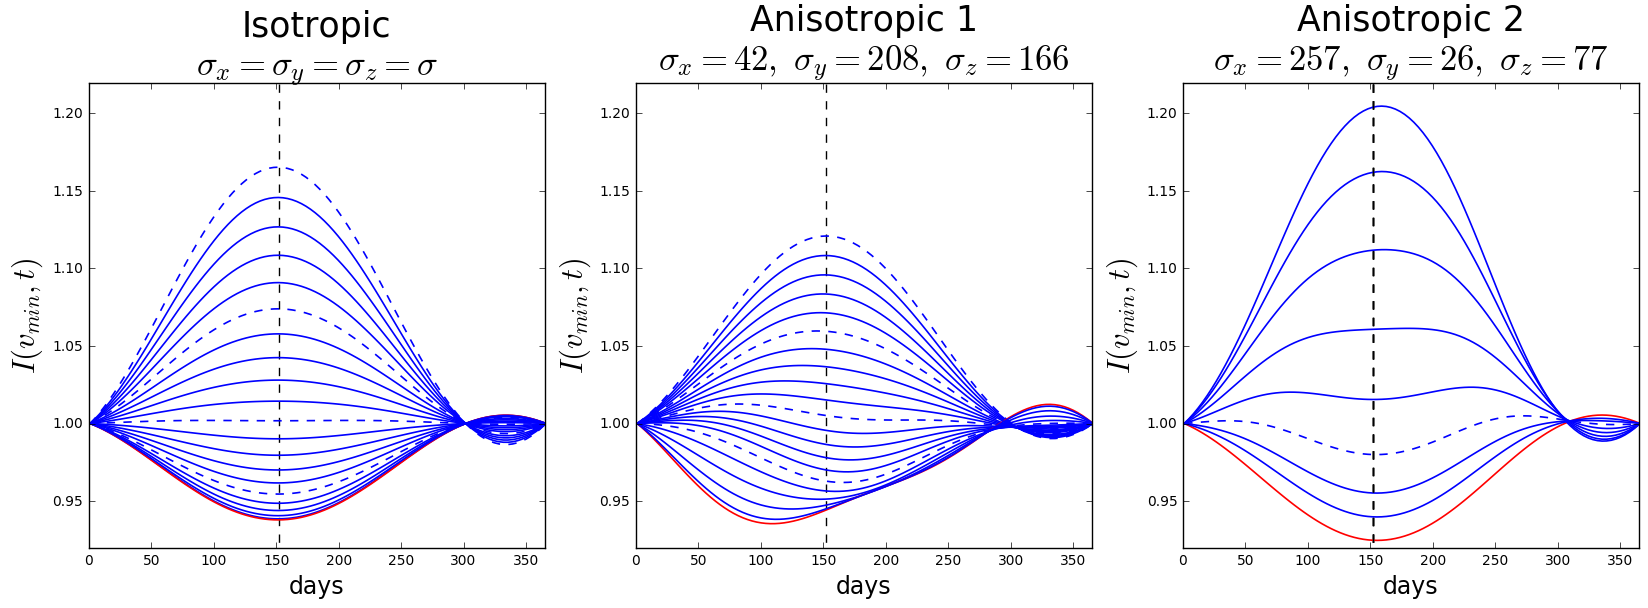

In [14]:
### fornengoś curves ###
# fig 1
fig ,[ax, ax2,ax3]= plt.subplots(1,3,figsize=(20,6))
ax.set_title("Isotropic\n"+r"$\sigma_x=\sigma_y=\sigma_z=\sigma$",
             fontsize=25)
ax.plot((152.,152.), (-0.92, 1.22), 'k--')

# fig 2
#fig2 ,ax2 = plt.subplots(figsize=(6,6))
ax2.set_title("Anisotropic 1\n"+r"$\sigma_x=42,\,\,\sigma_y=208,\,\,\sigma_z=166$",
              fontsize=25)
ax2.plot((152.,152.), (-0.92, 1.22), 'k--')
# fig 3

#fig3 ,ax3 = plt.subplots(figsize=(6,6))
ax3.set_title("Anisotropic 2\n"+r"$\sigma_x=257,\,\,\sigma_y=26,\,\,\sigma_z=77$",
              fontsize=25)
ax3.plot((152.,152.), (-0.92, 1.22), 'k--')
ax.set_ylim([0.92,1.22])
ax.set_xlim([0.,365])
ax2.set_ylim([0.92,1.22])
ax2.set_xlim([0.,365])
ax3.set_ylim([0.92,1.22])
ax3.set_xlim([0.,365])
ax.set_ylabel(r'$I(v_{min},t)$', fontsize=22)
ax2.set_ylabel(r'$I(v_{min},t)$', fontsize=22)
ax3.set_ylabel(r'$I(v_{min},t)$', fontsize=22)
ax.set_xlabel('days', fontsize=17)
ax2.set_xlabel('days', fontsize=17)
ax3.set_xlabel('days', fontsize=17)
#ax.text(225, 1.17,'sample size '+str(samp_size),fontsize=14)
### plots
get_plot('data155.56/out/',ax)
get_plot('data42/out/',ax2)
get_plot('data257/out/',ax3)

In [15]:
%%latex
In the figure above the red lines represent $v_{min}=0$, the doted blue lines reprecente multiples of on hundre as values for $v_{min}$. And the solid blue lines represent rasing values of v_{min}. Here two anisotropic cases are shown and the isotropic case aswell. In the case of the first anisotropic model with ($\sigma_x=42,\,\sigma_y=208,\,\sigma_z=166$)
the departure from the isotropic case come for low values of $v_min$ and happens in the first days of the year befor the maximum occurs. And in the other case, the second Anisotropic ($\sigma_x=257,\,\sigma_y=26,\,\sigma_z=77$), de values of the curve are higher and the deformation occurs for $v_{min}$ close to one hundred  where the curves present a small disminution at the moment of the maximum.

<IPython.core.display.Latex object>

## 1.4 Capture in the Sun
(Choi, Rott and Itow 2014)

In [16]:
%%latex
before adressing the effect of different  $f(v)$'s in the capture of wimps by the Sun we have to describe the mechanism through which a given nucleus o nucleon inside the Sun could interact with a passing WIMP. This interaction takes place in ecuation \ref{GouldCapture}, more specifically in the term
\begin{equation}
%\label{scateringFun}
\Omega_{vi}(w)=\sigma_i \, n_i \, \frac{M_i}{2\bar{\mu_i}^2} \int_{Q_{min}}^{Q_{max}} \, F^2(Q)d{Q}
\end{equation}
where $\sigma_i$ is the WIMP-nucleus $i$ elastic-scattering cross-section at zero-momentum transfer, $n_i$ is the number density of nucleus $i$ in the Sun, $M_i$ is the mass of nucleus i, $\bar{\mu_i}$ is the reduced mass of nucleus i and the WIMP, Q is the recoil energy.
the $F^2$ is the "form factor" supression defined by Gould in terms of the energy lost $\Delta E \propto Q$ as
\begin{equation}
F(Q)^2 = \exp(\Delta E/E_0)
\end{equation}
where
\begin{equation}
E_0=\frac{3 \hbar^2}{2 M_i R}
\end{equation}
is the characteristic coherence energy. The We may generalize the scattering function, $\Omega_i$, as
\begin{equation}
\Omega_{vi}(w)=(\sigma_i n_i w)\int_{\frac{u^2}{w^2}}^{\frac{\mu^2}{\mu_+^2}}\,\, \frac{\mu_+^2}{\mu}\exp{(-\Delta E/E_0)} \,d{\left( \frac{\Delta E}{M_{\chi}w^2/2}\right)}
\end{equation}

This may be evaluated as:

\begin{equation}
w\Omega_{vi}(w)=\frac{\sigma_i n_i}{b}\left[\exp{(-ax^2)}-\exp{(-bx^2)}\exp{(-A^2(a-b))}\right] 
\end{equation}
where
\begin{equation}
a=\frac{M_{\chi}\bar{v}^2}{3E_0} \,\,\,\, b=\frac{\mu}{\mu_+^2} a
\end{equation}

<IPython.core.display.Latex object>

In [17]:
%%latex
where $\bar{v}$ is the dispertion velocity assumed by Gould to be $\approx 300 $ km/s, and
\begin{equation}
\mu=\frac{M_{\chi}}{M_i} \,\,\,\, \mu_{\pm}=\frac{\mu \pm 1}{2}
\end{equation}
And it in order to scatter from a velocity $w$ to a velocity less than $v$ requiers a energy loss of at least
\begin{equation}

\frac{\Delta E}{E}\geq\frac{w^2 - v^2}{w^2} = \frac{u^2}{w^2} 
\end{equation}

We also consider an estimation of the nuclear radius of
\begin{equation}
R\simeq \left[.91\left(\frac{m}{GeV}\right)^{\frac{1}{3}}+.3\right]\times10^{-13}cm
\end{equation}

<IPython.core.display.Latex object>

In [18]:
%%latex
Two cases can be consider now, the spin dependet ,SD, and the spin independet,SI. For the SD WIMP capture the contributions of hevier elements than hydrogen are neglected. On the other hand in the SI coupling case isospin conserving scattering is assumed resulting in an SI zero momentum transfer cross-section $\sigma_i^{SI}$ of the form
\begin{equation}
\sigma_i^{SI}=\sigma_p^{SI} I^2 \frac{\bar{\mu_i}^2}{\mu_p^2}
\end{equation}
where $\sigma_p^{SI}$ is the SI WIMP-nucleon zero-momentum transfer scattering cross-section, $I$ is the mass number of the nucleus and $\mu_p$ is the WIMP-nucleon reduced mass.

So then to calculate the total Capture Rate the above expression has to be summed over al relevan nuvlear species inside the Sun and integrated over the ddistance r from the center as

\begin{equation}
C_C = \int_0^{R_{\odot}}\,4\pi r^2 d{r} \sum\limits_{i} \frac{d{C_i}}{d{V}}
\end{equation}

So if we consider the $f(v)$ in equation \ref{GouldCapture}  as Dirac's delta to supress the effect of the velocity distribution function and observed the particle physic part of the problem by ploting this capture rate with respect of the mass of the WIMP we get.


<IPython.core.display.Latex object>

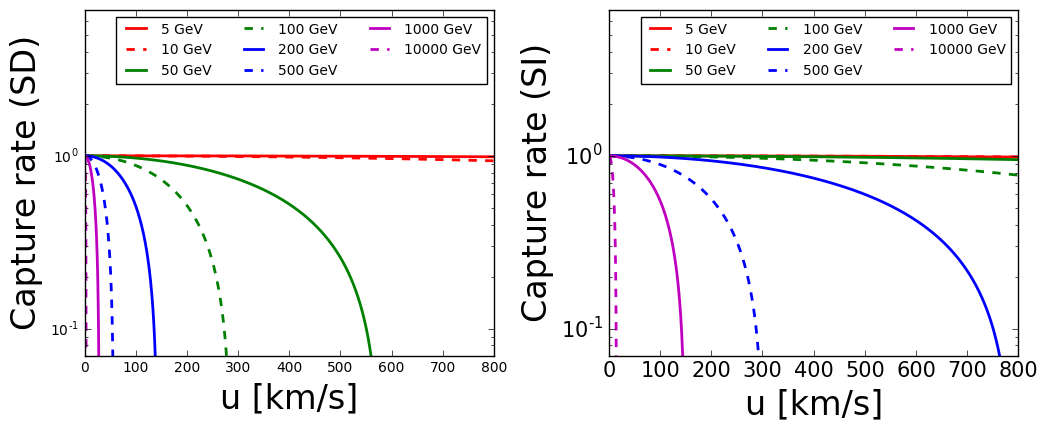

In [19]:
#ca.get_variables() # prints variables in use (check captureLib)
### Plot parameters ###
fig ,(ax,ax1) = plt.subplots(1,2, figsize=[10,4])

plt.tight_layout(pad=1, w_pad=5.5, h_pad=1.0)

ax.set_yscale('log')
ax.set_ylim([0.07,7])
ax.set_xlabel('u [km/s]',fontsize=24)
ax.set_ylabel('Capture rate (SD)',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = [i for i in np.arange(1,800.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
for m,c in zip(masses,colors):
            i +=1
            arrays[i]=particle_physics(x_array,m)
            title = str(m)+' GeV'
            ax.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = ax.legend(loc='upper right', ncol=3, shadow=False, fontsize=10)
frame = legend.get_frame()


### Plot parameters ###
ax1.set_yscale('log')
ax1.set_ylim([0.07,7])
ax1.set_xlabel('u [km/s]',fontsize=24)
ax1.set_ylabel('Capture rate (SI)',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[0 for l in x_array]]
x_array = [i for i in np.arange(1,800.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOUSI)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
sun = ca.get_Sun()
for m,c in zip(masses,colors):
            i +=1
            for j in range(0,len(sun)):
                arrays[i]+=particle_physics(x_array,m,j)
            title = str(m)+' GeV'
            ax1.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend1 = ax1.legend(loc='upper right', ncol=3, shadow=False, fontsize=10)
frame = legend1.get_frame()



In [20]:
%%latex
in this figure we observe two main things. First and foremost that the higher the mass of the WIMP is the slower it needs to go to have a chance to get capture. This gives some insigh on the differences between direct detection and indirect detections sensitivities. For indirect detectiona as we saw in the previous section the faster the WIMPs are going the higher the chance of the leaving a meassurable signal in the detector will be. On the other hand for indirect detection in order to get capture lower WIMP velocities become more desireble.
The second thing we could conclude from this figures is that in the case of The spin independent interactions the capture is supressed later in the velocity axis. i. e. at higher velocity there will still be a chance for heavy WIMPs to get capture by spin independent interactions inside the Sun.
Now we can go on and study the effect of considering different velocity distributions assumption from the standard assumpsion, The maxwellian distribution. To achieve this a ratio will be presented, a boost with respect to the maxwellian distribution. 
\begin{equation}
C_{boost} = \frac{C_{Ci}}{C_{Cmaxwellian}}
\end{equation}
where the $C_{Ci}$ representes the full capture calculation using one of the two alternative velocity distribution presented above.

<IPython.core.display.Latex object>

In [21]:
v_Sun = 220.#vdf.v_Sun
v_esc = vdf.v_esc
v_0 = vdf.v_shm
sun = ca.get_Sun()
n1= vdf.get_n(vdf.shm_gal)
n2= vdf.get_n(vdf.mao_gal)
n3= vdf.get_n(vdf.lin_gal)

array = []
array2 = []
m_array = np.logspace(0.1, 4, num=100)
#x_array = np.append(x_array, 10000)
final = v_Sun+v_esc
#print final
x = [i for i in np.arange(0.1,v_Sun+v_esc)]

def product(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final



func = np.vectorize(product)
shm = func(m_array,vdf.shm_gal)
shm_full = shm
#print "shm"
lin = func(m_array, vdf.lin_gal)
#print "lin"
mao = func(m_array, vdf.mao_gal)
#print "mao"
array = np.divide(lin,shm)
array2 = np.divide(mao,shm)



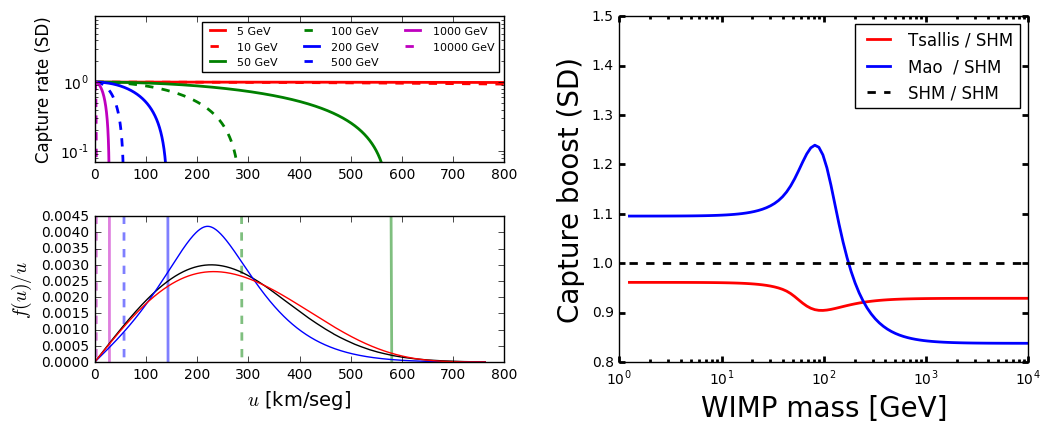

In [22]:
### Plotting section
#fig ,ax = plt.subplots(figsize=[4,4])
fig = plt.figure()

fig.set_size_inches(10,4)
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax = plt.subplot(122)

plt.tight_layout(pad=1, w_pad=5.5, h_pad=2.0)

ax.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax.set_ylabel('Capture boost (SD)',fontsize=20)
ax.set_xscale('log')
ax.set_ylim([0.8,1.5])
    #ax.set_xlim([1,20000])
line1 = ax.plot(m_array, array,'r-', linewidth=2.0,
                    label='Tsallis / SHM')
line2 = ax.plot(m_array, array2,'b-', linewidth=2.0,
                    label="Mao  / SHM")
shm = [1 for i in m_array]
SHM = ax.plot(m_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")
legend = ax.legend(loc='upper right', shadow=False)

Tsallis_MAXW = array
Mao_MAXW = array2

# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()
#fig.set_size_inches(10, 5)   
plt.tick_params(which='both', width=2)


ax1.set_yscale('log')
ax1.set_ylim([0.07,9])
ax1.set_ylabel('Capture rate (SD)',fontsize=12)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = [i for i in np.arange(1,800.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
for m,c in zip(masses,colors):
            i +=1
            arrays[i]=particle_physics(x_array,m)
            title = str(m)+' GeV'
            ax1.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)
            ax2.plot(x_array, normal(arrays[i]),c,linewidth=2.0, alpha = 0.5)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
legend1 = ax1.legend(loc='upper right', ncol=3, shadow=False, fontsize=8)
frame = legend1.get_frame()


sun=np.vectorize(vdf.gal_to_sun)

SHM_sun = sun(x,vdf.shm_gal)*n1
MAO_sun = sun(x,vdf.mao_gal)*n2
LIN_sun = sun(x,vdf.lin_gal)*n3


labelsize=14
ax2.set_ylim([0,0.0045])
ax2.set_ylabel(r'$f(u)/u$', fontsize=labelsize)
ax2.set_xlabel(r'$u$ [km/seg]', fontsize=labelsize)
ax2.plot(x, sun(x,vdf.shm_gal)*n1,'k-', label='Maxwellian')
ax2.plot(x, sun(x,vdf.mao_gal)*n2, 'b-',label='Mao')
ax2.plot(x, sun(x,vdf.lin_gal)*n3, 'r-',label='Tsallis')
#legend = ax2.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)
#frame = legend.get_frame()

In [23]:
%%latex
When trying to understand the capture boost presented in the right side previous set of figures it is very usefull to first analyse the two figures of the right. The top one is the particle physics part of the problem and the botton one the astrophysiscs part of the problem with the particle physics limits plotted on top. Both figure where presented and explained in the previous sections. What is aimed here is to show those vertical lines in top of the velocity distribution as the limits at which a WIMP of the corresponding mass starts to be too fast to get captured by the Sun. 

Now, once this is clear explaining the parts of the capture boost lines becomes easier. The first plateau in the low mass area correspond to the range of masses that can be captured at all velocities bellow the escape velocities. Then around to $100$ Gev a peak and a valley take place for the Mao distribution and the Tsallis distribution respectively, this occurs when the particle physics, PP, parts starts to suppres the capture at a velocity in which the difference in the populations of particles starts to be different betwen the new assumtions and the Maxwellian case. Finally a second plateau is observed as a result of the rapid supression of the capture for very high WIMP masses.

<IPython.core.display.Latex object>

## 1.5 Dark Disc effect
(ling 2009)

In [24]:
%%latex
Some cosmological simulation sugested that a milky way like galaxy could have a dark disc. i.e. a higher Dark Matter density in the galactic disc. Further studies on this Dark Disc revealed that it was the product of a particular event happening in the history of the galaxy, a satellite or a sub-halo comming into the galactic disc at low angles and generating as a result a Dark Disc. 
Recent cosmological simulation are now reducing the possibility of this happening but it is still a interesting to study the effect of the presences of a Dark Disc in the WIMP capture by the Sun. It is in this line that we can consider some other velocity distributions function that include the present of a Dark Disc. Thus we will consider three cases, a Tsallis distribution with a strong Dark disc, and two Tsallis distribuion with a mild Dark Disc with a differnt ration  with the halo in the number of particles, one with the icial number of particle as the halo and an other one with 1/3 the number of particles.
This velocity distributions are shown in the following figures in the galactic frame of reference and in the solar frame of reference

<IPython.core.display.Latex object>

In [25]:
################## distributions ############
def tsallis(v,q,v_0):
    inside = (1 - ((1-q) * ((v)**2) / v_0**2))
    power = (q/(1-q))
    if inside >= 0:
        return 4 * np.pi * v**2 * inside**power
    else:
        return 0

def gal_to_sun(u, f, q, v_0, lag, esc_sun=[vdf.v_esc, vdf.v_Sun]):
        def transform(x, u, f, es):
            v_S = 220.-lag
            v = sqrt((u**2) + (v_S**2) + (2 * u * v_S * x))
            return u**2*f(v, q, v_0)/v**2

        esc = esc_sun[0]
        sun = esc_sun[1]
        #n = integrate.quad(f, 0, v_e,args=(v_r,v_e))[0]
        result = quad(transform, -1, 1, args =(u, f, esc))[0]
        return  result    
    


def maxwellian_distribution(v,q,v_0):
    return (v**2/v_0**3)*exp(-3. * (v)**2 / (2. * v_0**2))

v_array = np.arange(0,700)
Tsallis = np.vectorize(tsallis)
Maxwellian = np.vectorize(maxwellian_distribution)
tu_Sun =  np.vectorize(gal_to_sun)

disc_GALsd= tu_Sun(v_array,tsallis,0.88,71.,50)
halo_GALsd = Tsallis(v_array,0.88,220.)
disc_GALmd= tu_Sun(v_array,tsallis,0.7,200.,70.)
halo_GALmd = Tsallis(v_array,0.7,300.)


StronDarkDisc= (disc_GALsd/(2*sum(disc_GALsd))) + (halo_GALsd/(2*sum(halo_GALsd)))
mildDarkDisc3= (disc_GALmd/(4*sum(disc_GALmd))) + (3*halo_GALmd/(4*sum(halo_GALmd)))
mildDarkDisc1= (disc_GALmd/(2*sum(disc_GALmd))) + (halo_GALmd/(2*sum(halo_GALmd)))
std_maxwellian = Maxwellian(v_array,0,270.)/sum(Maxwellian(v_array,0,270.))


halo_SUNsd = tu_Sun(v_array,tsallis,0.88,220,0)
disc_SUNsd = tu_Sun(v_array,tsallis,0.88,71.,170.)
disc_SUNmd= tu_Sun(v_array,tsallis,0.7,200.,150)
halo_SUNmd = tu_Sun(v_array,tsallis,0.7,300.,0)

StronDarkDiscSUN= (disc_SUNsd/(2*sum(disc_SUNsd))) +(halo_SUNsd/(2*sum(halo_SUNsd)))
mildDarkDisc3SUN= (disc_SUNmd/(4*sum(disc_SUNmd))) + (3*halo_SUNmd/(4*sum(halo_SUNmd)))
mildDarkDisc1SUN= (disc_SUNmd/(2*sum(disc_SUNmd))) + (halo_SUNmd/(2*sum(halo_SUNmd)))
aux_maxwellian = tu_Sun(v_array,Maxwellian,0,270.,0)
std_maxwellianSUN = aux_maxwellian/sum(aux_maxwellian)



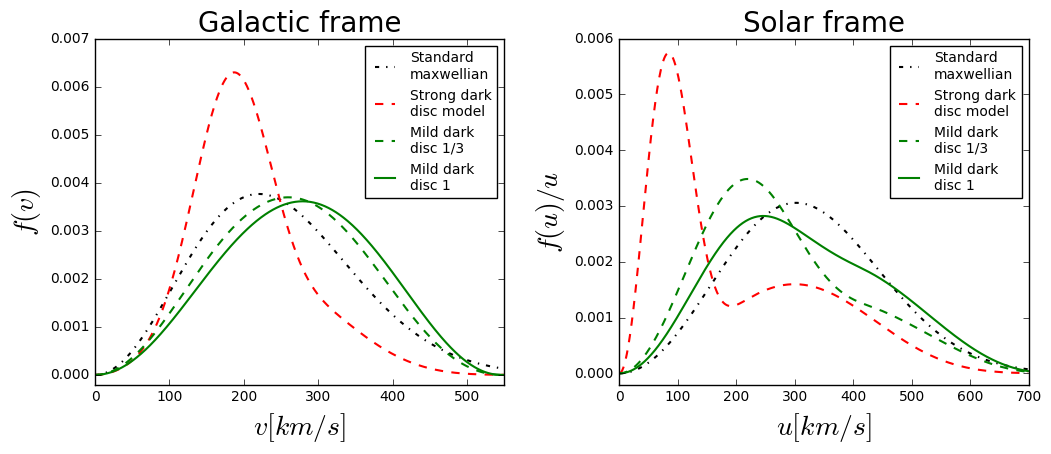

In [27]:

fig, (ax,ax1) = plt.subplots(1,2,figsize=(10,4)) 
plt.tight_layout(pad=1, w_pad=5.5, h_pad=1.0)

ax.set_ylim([-0.0002,0.007])
ax.set_xlim([0,550])
ax.set_ylabel(r'$f(v)$', fontsize=20)
ax.set_xlabel(r'$v [km/s]$', fontsize=20)
ax.set_title("Galactic frame", fontsize=20)
ax.plot(v_array,std_maxwellian, 'k-.', linewidth=1.5,label='Standard\nmaxwellian')
ax.plot(v_array,StronDarkDisc, 'r--',linewidth=1.5,label='Strong dark\ndisc model')
ax.plot(v_array,mildDarkDisc1,'g--',linewidth=1.5,label='Mild dark\ndisc 1/3 ')
ax.plot(v_array,mildDarkDisc3,'g-',linewidth=1.5,label='Mild dark\ndisc 1')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=10)
frame = legend.get_frame()


ax1.set_ylim([-0.0002,0.006])
ax1.set_xlim([0,700])
ax1.set_ylabel(r'$f(u)/u$', fontsize=20)
ax1.set_xlabel(r'$u [km/s]$', fontsize=20)
ax1.set_title("Solar frame", fontsize=20)


ax1.plot(v_array,std_maxwellianSUN, 'k-.', linewidth=1.5,label='Standard\nmaxwellian')
ax1.plot(v_array,StronDarkDiscSUN, 'r--',linewidth=1.5,label='Strong dark\ndisc model')
ax1.plot(v_array,mildDarkDisc1SUN,'g--',linewidth=1.5,label='Mild dark\ndisc 1/3 ')
ax1.plot(v_array,mildDarkDisc3SUN,'g-',linewidth=1.5,label='Mild dark\ndisc 1')
legend1 = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=10)
frame = legend1.get_frame()

In [216]:
%%latex
Now we can proceed to the computation of the boost of this assumptions in the same way we did before.

<IPython.core.display.Latex object>

In [134]:
## parameters given in LING2009 for the strong disc model
v0_Hsd, v0_Dsd, vlag_sd = 220., 50*sqrt(2), 50
q_sd = 0.88
## normalization factors in the galactic frame of references
n_sd = [quad(tsallis, 0.,700., args=(q_sd,v0_Hsd))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Dsd, vlag_sd))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Hsd, 0))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Dsd, 220.-vlag_sd))[0]
       ]

## parameters given in LING2009 for the mild disc model
v0_Hmd3, v0_Dmd3, vlag_md3 = 300., 200., 70.
q_md3 = 0.7
## normalization factors in galactic and solar frame of reference.
## structure [halo_gal, disc_gal, halo_sun, halo_sun]
## this might make a diferente in the following calculations
n_md3 = [quad(tsallis, 0.,700., args=(q_md3,v0_Hmd3))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Dmd3, vlag_md3))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Hmd3, 0))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Dmd3, 220.- vlag_md3))[0]
       ]
#### standard maxwellian normalizations
n_max = [quad(maxwellian_distribution, 0.,700., args=(0,270.))[0],
         quad(gal_to_sun,0.,700.,args=(maxwellian_distribution,0,270,0))[0]]


def strong_DDSUN(v):
    halo = gal_to_sun(v, tsallis, q_sd, v0_Hsd, 0)
    disc = gal_to_sun(v, tsallis, q_sd, v0_Dsd, 220-vlag_sd)
    return (halo/(2*n_sd[2]))+(disc/(2*n_sd[3]))

def mild_DD3SUN(v):
    halo = gal_to_sun(v, tsallis, q_md3, v0_Hmd3, 0)
    disc = gal_to_sun(v, tsallis, q_md3, v0_Dmd3, 220-vlag_md3)
    return (3*halo/(4*n_md3[2]))+(disc/(4*n_md3[3]))

def mild_DD1SUN(v):
    halo = gal_to_sun(v, tsallis, q_md3, v0_Hmd3, 0)
    disc = gal_to_sun(v, tsallis, q_md3, v0_Dmd3, 220-vlag_md3)
    return (halo/(2*n_md3[2]))+(disc/(2*n_md3[3]))

def standard_maxwellian(v):
    return gal_to_sun(v,maxwellian_distribution,0,270.,0.)/ n_max[1]
    
sun = ca.get_Sun()


def captureFunctionSI(m,f,nuc):
    def integrand(v):
        return f(v) * ca.caprate_GOUSI(v, m, nuc) / v
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSigma(m,f,nuc):
    def integrand(v):
        return f(v) * (ca.caprate_GOUSI(v, m, nuc)**2) / v**2
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSHM_SI(m,nuc):
    def integrand(v):
        return vdf.gal_to_sun(v,vdf.shm_gal) * ca.caprate_GOUSI(v,m,nuc)
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureFunction(m,f):
    def integrand(v):
        return f(v) * ca.caprate_GOU(v,m) / v
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSHM(m):
    def integrand(v):
        return vdf.gal_to_sun(v,vdf.shm_gal) * ca.caprate_GOU(v,m)
    result=integrate.quad(integrand,0,v_esc)
    return result[0]


SI = np.vectorize(captureFunctionSI)
SHMcapture = np.vectorize(captureSHM_SI)
m_array = np.logspace(0.1, 4, num=100)
result_disc = np.zeros(len(m_array))
re_mild1 = np.zeros(len(m_array))
re_mild3 = np.zeros(len(m_array))
result_SHM = np.zeros(len(m_array))

for i in range(0,len(sun)):
    #print 'element--> ',sun[i][4]
    result_disc += SI(m_array,strong_DDSUN, i)
    result_SHM += SI(m_array,standard_maxwellian, i)
    re_mild1 += SI(m_array,mild_DD1SUN, i)
    re_mild3 += SI(m_array,mild_DD3SUN, i)

element-->  H
element-->  He
element-->  C
element-->  N
element-->  O
element-->  Ne
element-->  Mg
element-->  S
element-->  Fe


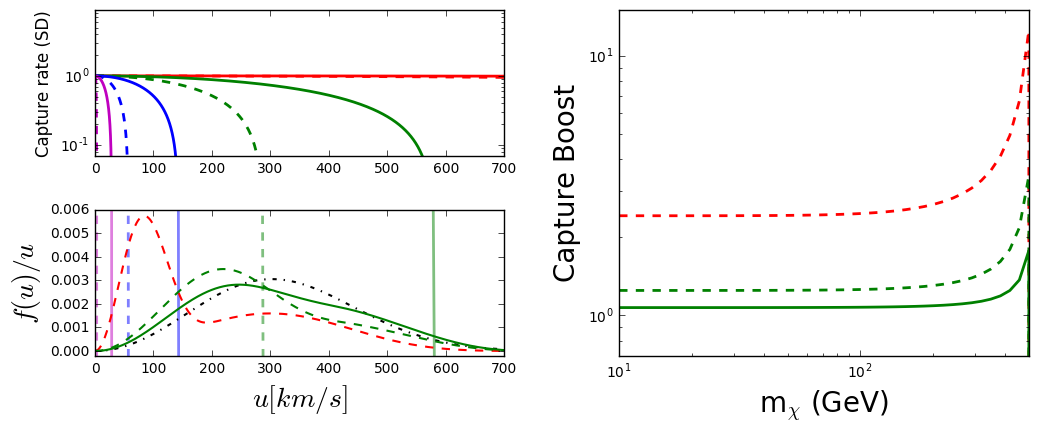

In [155]:
ratio_strong = result_disc / result_SHM
ratio_mild1 = re_mild1 / result_SHM
ratio_mild3 = re_mild3 / result_SHM




fig = plt.figure()

fig.set_size_inches(10,4)
ax1 = plt.subplot(221)
axx = plt.subplot(223)
ax2 = plt.subplot(122)

#ax1 = plt.subplot2grid((3, 3), (0, 0))
#ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2,rowspan=2)
#axx = plt.subplot2grid((3, 3), (1, 0))


plt.tight_layout(pad=1, w_pad=5.5, h_pad=2.0)


ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)

ax.set_xscale('log')
ax2.set_xscale('log')
ax.set_xlim([10,500])
ax2.set_xlim([10,500])
ax2.set_ylim([0.7,15])
ax.set_ylim([10e43,10e45])
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
ax.set_ylabel(r'Capture rate (CB)', fontsize=20)
ax2.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
ax2.set_ylabel(r'Capture Boost', fontsize=20)

ax2.plot(m_array,ratio_strong, 'r--', linewidth = 2, label='strong disc\nmodel')
ax2.plot(m_array,ratio_mild1, 'g--', linewidth = 2, label='mild disc\nmodel 1/1')
ax2.plot(m_array,ratio_mild3, 'g-', linewidth = 2, label='mild disc\nmodel 1/3')

#legend2 = ax2.legend(loc='upper left', ncol=1, shadow=False, fontsize=12)
#frame = legend2.get_frame()


ax1.set_yscale('log')
ax1.set_ylim([0.07,9])
ax1.set_ylabel('Capture rate (SD)',fontsize=12)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = [i for i in np.arange(1,700.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
for m,c in zip(masses,colors):
            i +=1
            arrays[i]=particle_physics(x_array,m)
            title = str(m)+' GeV'
            ax1.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)
            axx.plot(x_array, normal(arrays[i]),c,linewidth=2.0, alpha = 0.5)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
#legend1 = ax1.legend(loc='upper right', ncol=3, shadow=False, fontsize=8)
#frame = legend1.get_frame()


axx.set_ylim([-0.0002,0.006])
axx.set_xlim([0,700])
axx.set_ylabel(r'$f(u)/u$', fontsize=20)
axx.set_xlabel(r'$u [km/s]$', fontsize=20)

axx.plot(v_array,std_maxwellianSUN, 'k-.', linewidth=1.5,label='Standard\nmaxwellian')
axx.plot(v_array,StronDarkDiscSUN, 'r--',linewidth=1.5,label='Strong dark\ndisc model')
axx.plot(v_array,mildDarkDisc1SUN,'g--',linewidth=1.5,label='Mild dark\ndisc 1/3 ')
axx.plot(v_array,mildDarkDisc3SUN,'g-',linewidth=1.5,label='Mild dark\ndisc 1')

In [156]:
%%latex
Now in the same way as we analysed the previous boost we can see here that the assumption of a Dark Disc gives a enhancement in the capture that even rise for high masses which didn't occur in the absence of a Dark Disc. 

<IPython.core.display.Latex object>

## 2. Uncertainties

In [ ]:
%%latex
Even though we have been making conclusion on the obtained Boost curves we haven consider some statistic properties of these results. Meaning that we could be ignoring for example the posible theoretical uncertainties that could rise from this curves. To study this it is enought to carry the following calculation.
the expectation value of a function $g(v)$ is defined as
\begin{equation}
E[g(v)]=\langle g \rangle=\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv
\end{equation}
where $f(v)$ is the probability distribution, in our case the normalized velocity distribution function, and

\begin{equation}
g(v)=\frac{PP(v)}{v}
\end{equation}

here PP(v) is the particle physics section of the capture rate expresion as defined by A.Gould in 1987. Then the standard deviation $\sigma_g$ is given by

\begin{equation}
\sigma_g^{2}= E[g(v)^2] - \big[E[g(v)]\big]^2\,=\,\langle g(v)^2 \rangle - \langle g(v) \rangle^2
\end{equation}

\begin{equation}
\sigma_g^{2} = \int _{-\infty} ^{\infty} g(v)^2 \,f(v) \,dv - \Bigg[\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv\Bigg]^2 
\end{equation}

finally:
\begin{equation}
\sigma_g^{2} = \int _{v_{min}} ^{v_{esc}} g(v)^2 \,f(v) \,dv - \Bigg[\int _{v_{min}} ^{v_{esc}} g(v) \,f(v) \,dv\Bigg]^2 
\end{equation}

so calculating this for the capture rates using the all different velocity distribution assumptions:

In [162]:
x = [i for i in np.arange(0.1,v_Sun+v_esc)]

def product(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final

def product_square(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * (va2)**2 / u
    array = map(inside_int,x)
    final = np.trapz(array)
    return final 

def cap(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final

## find this fuction above
E_g = np.vectorize(product)
E_g2 = np.vectorize(product_square)
check = np.vectorize(cap)
## fist test with maxwellian(shm) ##
fdu = vdf.shm_gal
mass_array = np.logspace(0.1, 4, num=100)
max1 = E_g(mass_array,fdu)
max2 =  E_g2(mass_array,fdu)
check_line= check(mass_array, fdu)
sigma_maxw = np.sqrt(max2 - (max1**2))

fdu = vdf.lin_gal
mass_array = np.logspace(0.1, 4, num=100)
ling1 = E_g(mass_array,fdu)
ling2 =  E_g2(mass_array,fdu)
check_line= check(mass_array, fdu)
sigma_ling = np.sqrt(max2 - (max1**2))

fdu = vdf.mao_gal
mass_array = np.logspace(0.1, 4, num=100)
mao1 = E_g(mass_array,fdu)
mao2 =  E_g2(mass_array,fdu)
sigma_mao = np.sqrt(max2 - (max1**2))

arr_maxw = max1 + sigma_maxw
arr_maxw2 = max1 - sigma_maxw
arr_ling = ling1 + sigma_ling
arr_ling2 = ling1 - sigma_ling
arr_mao = mao1 + sigma_mao
arr_mao2 = mao1 - sigma_mao

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:71: RuntimeWarning: invalid value encountered in sqrt


/usr/lib/python2.7/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


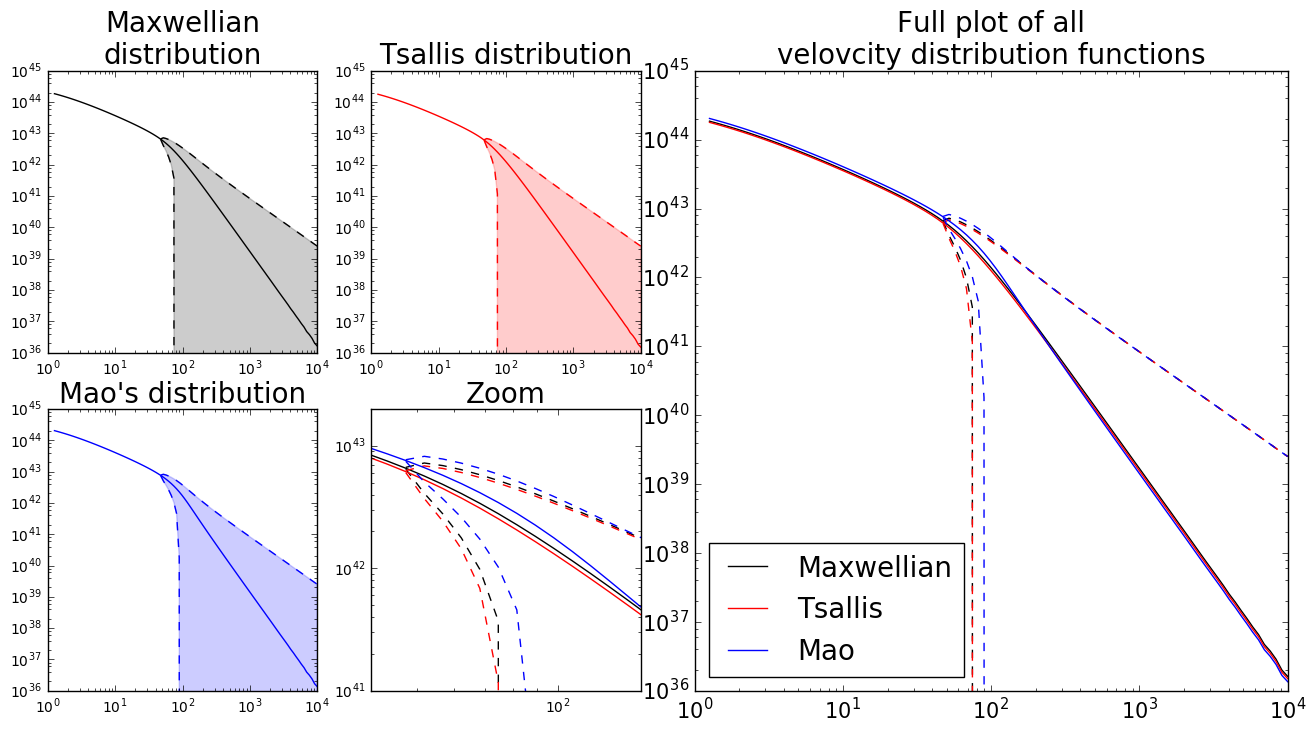

In [165]:
from matplotlib import gridspec
x_array = np.logspace(0.1, 4, num=100)
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,8))
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0:,2:])


ax1.set_title('Maxwellian\ndistribution',fontsize=20)
ax1.plot(x_array,arr_maxw,'k--')
ax1.plot(x_array,arr_maxw2,'k--')
ax1.plot(x_array,max1,'k-')
ax1.fill_between(x_array,arr_maxw,arr_maxw2,color='k',alpha=0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('Tsallis distribution',fontsize=20)
ax2.plot(x_array,arr_ling,'r--')
ax2.plot(x_array,arr_ling2,'r--')
ax2.plot(x_array,ling1,'r-')
ax2.fill_between(x_array,arr_ling,arr_ling2,color='r',alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.set_title("Mao's distribution",fontsize=20)
ax3.plot(x_array,arr_mao,'b--')
ax3.plot(x_array,arr_mao2,'b--')
ax3.plot(x_array,mao1,'b-')
ax3.fill_between(x_array,arr_mao,arr_mao2,color='b',alpha=0.2)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_title("Zoom",fontsize=20)
ax4.plot(x_array,arr_maxw,'k--')
ax4.plot(x_array,arr_maxw2,'k--')
ax4.plot(x_array,max1,'k-')
ax4.plot(x_array,arr_ling,'r--')
ax4.plot(x_array,arr_ling2,'r--')
ax4.plot(x_array,ling1,'r-')
ax4.plot(x_array,arr_mao,'b--')
ax4.plot(x_array,arr_mao2,'b--')
ax4.plot(x_array,mao1,'b-')
ax4.set_xlim([40,150])
ax4.set_ylim([1e41,2e43])
ax4.set_xscale('log')
ax4.set_yscale('log')

ax5.set_title("Full plot of all\nvelovcity distribution functions",fontsize=20)
ax5.plot(x_array,arr_maxw,'k--')
ax5.plot(x_array,arr_maxw2,'k--')
ax5.plot(x_array,max1,'k-',label='Maxwellian')
ax5.plot(x_array,arr_ling,'r--')
ax5.plot(x_array,arr_ling2,'r--')
ax5.plot(x_array,ling1,'r-',label='Tsallis')
ax5.plot(x_array,arr_mao,'b--')
ax5.plot(x_array,arr_mao2,'b--')
ax5.plot(x_array,mao1,'b-',label='Mao')
ax5.set_xscale('log')
ax5.set_yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend = ax5.legend(loc='lower left', shadow=False,prop={'size':20})
frame = legend.get_frame()
plt.show()

In [177]:
to_sigma = np.vectorize(captureSigma)
Sdisc1 = np.zeros(len(m_array))
mild11 = np.zeros(len(m_array))
mild31 = np.zeros(len(m_array))
SHM1 = np.zeros(len(m_array))

for i in range(0,len(sun)):
    print 'element--> ',sun[i][4]
    Sdisc1 += to_sigma(m_array,strong_DDSUN, i)
    SHM1 += to_sigma(m_array,standard_maxwellian, i)
    mild11 += to_sigma(m_array,mild_DD1SUN, i)
    mild31 += to_sigma(m_array,mild_DD3SUN, i)

element-->  H
element-->  He
element-->  C
element-->  N
element-->  O
element-->  Ne
element-->  Mg
element-->  S
element-->  Fe


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


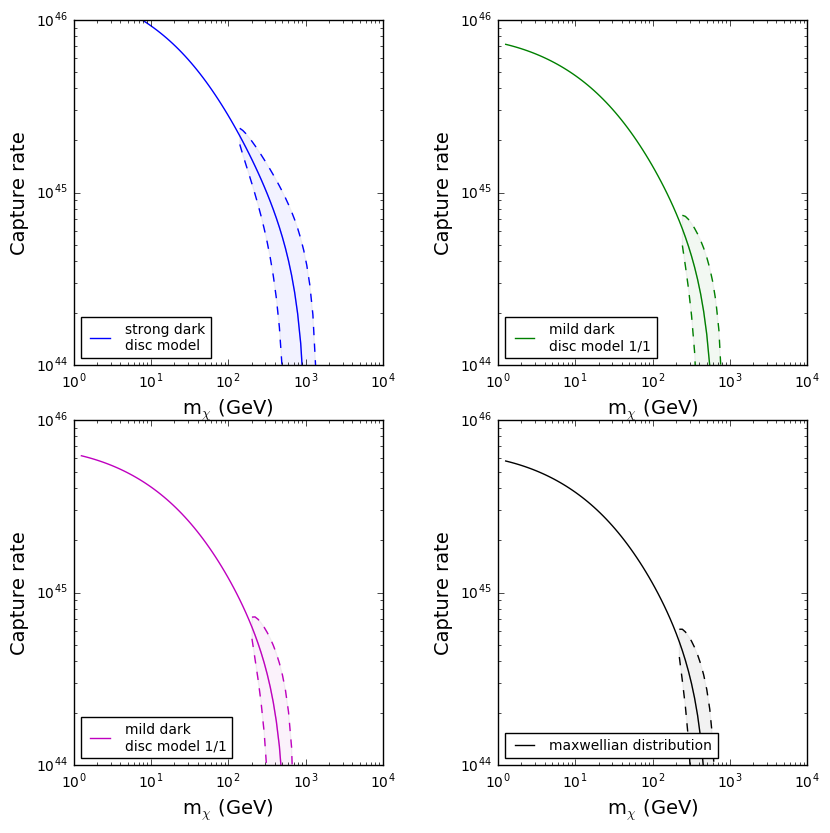

In [190]:
first_term = [Sdisc1, mild11, mild31, SHM1]
second_term = [result_disc, re_mild1, re_mild3, result_SHM]



sigmaSD = sqrt(first_term[0] - (second_term[0]**2))
sigmaMD1 = sqrt(first_term[1] - (second_term[1]**2))
sigmaMD3 = sqrt(first_term[2] - (second_term[2]**2))
sigmaSHM = sqrt(first_term[3] - (second_term[3]**2))

sigmas = [sigmaSD, sigmaMD1, sigmaMD3, sigmaSHM]

def curva_y_sigma(ax, array, sigma, color, legenda):
    ax.plot(m_array,array, color,label=legenda)
    ax.plot(m_array,array+sigma, color+'--')
    ax.plot(m_array,array-sigma, color+'--')
    ax.fill_between(m_array,array+sigma, 
                    array, facecolor=color,alpha=0.05)
    ax.fill_between(m_array,array-sigma, 
                    array, facecolor=color,alpha=0.05)
    return 0

def layout(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_ylim([10e43,10e45])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=14)
    ax.set_ylabel(r'Capture rate', fontsize=14)
    legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=10)
    return 0

def layout_boost(ax):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.tick_params(axis='both', which='minor', labelsize=13)
    ax.set_ylim([0.7,15])
    ax.set_xlim([10,500])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
    ax.set_ylabel(r'Capture Boost (CB)', fontsize=20)
    legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=12)
    return 0

def boost_sigma(cap_fun, sig_fun, cap_shm, sig_shm):
    return (sig_fun/cap_shm) - (cap_fun * sig_shm / (cap_shm**2))
    fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(12,12)) 


fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(8,8)) 

plt.tight_layout(pad=1, w_pad=5.5, h_pad=2.0)

curva_y_sigma(ax1, result_disc, sigmaSD,'b',
              'strong dark\ndisc model')
curva_y_sigma(ax2, re_mild1, sigmaMD1,'g',
              'mild dark\ndisc model 1/1')
curva_y_sigma(ax3, re_mild3, sigmaMD3,'m',
              'mild dark\ndisc model 1/1')
curva_y_sigma(ax4, result_SHM, sigmaSHM,'k',
              'maxwellian distribution')

layout(ax1)
layout(ax2)
layout(ax3)
layout(ax4)

frame = legend.get_frame()

In [191]:
%%latex
so when doing the boost $B_i$ that gives the ratio between the function in question with respect to the maxwellian velocity distribution function we consider the variance $\sigma_i$ prevously defined by doing error propagation in the following way 
\begin{equation}
B_i=\frac{C_i}{C_{maxwellian}}
\end{equation}
so then:

\begin{equation}
\Delta B_i = \frac{\Delta C_i}{C_{maxwellian}}-\frac{C_i}{C_{maxwellian}^2}\Delta C_{maxwellian}
\end{equation}

where $i$ could be either of the different velocity distribution function discussed. The final result fro the boost without Dark disc is

<IPython.core.display.Latex object>

In [192]:
sigma_R_mao = (sigma_mao / max1)-(mao1 * sigma_maxw / (max1**2))
sigma_R_Ling = (sigma_ling / max1)-(ling1 * sigma_maxw / (max1**2))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in greater


0

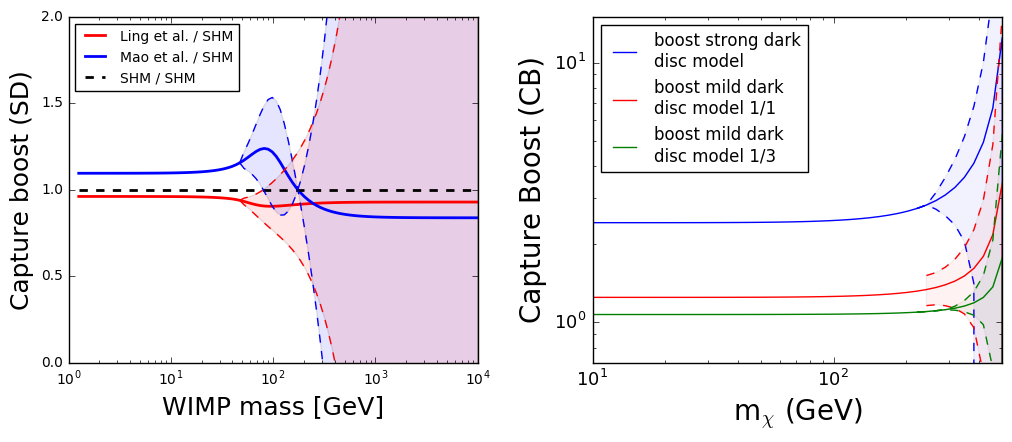

In [208]:
maoR_plus_sigma = array2 + sigma_R_mao
maoR_minus_sigma = array2 - sigma_R_mao
lingR_plus_sigma = array + sigma_R_Ling
lingR_minus_sigma = array - sigma_R_Ling
 

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

plt.tight_layout(pad=1, w_pad=5.5, h_pad=2.0)

ax1.set_xlabel('WIMP mass [GeV]',fontsize=18)
ax1.set_ylabel('Capture boost (SD)',fontsize=18)
ax1.set_xscale('log')
ax1.set_ylim([0,2])
    #ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax1.legend(loc='upper left', shadow=False,prop={'size':10})
ax1.plot(x_array,maoR_plus_sigma,'b--')
ax1.plot(x_array,maoR_minus_sigma,'b--')
ax1.plot(x_array, lingR_plus_sigma, 'r--')
ax1.plot(x_array, lingR_minus_sigma, 'r--')
ax1.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.1)
ax1.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()

########## boost ###########################
sig_boostSD = boost_sigma(result_disc, sigmaSD,
                          result_SHM, sigmaSHM)
sig_boostSD[np.where(sig_boostSD>0)] = 0
sig_boostMD1 = boost_sigma(re_mild1, sigmaMD1,
                          result_SHM, sigmaSHM)
sig_boostMD3 = boost_sigma(re_mild3, sigmaMD3,
                          result_SHM, sigmaSHM)

sig_boostMD3[np.where(sig_boostMD3>0)] = 0

curva_y_sigma(ax2, ratio_strong, sig_boostSD,'b',
              'boost strong dark\ndisc model')
curva_y_sigma(ax2, ratio_mild1, sig_boostMD1,'r',
              'boost mild dark\ndisc model 1/1')
curva_y_sigma(ax2, ratio_mild3, sig_boostMD3,'g',
              'boost mild dark\ndisc model 1/3')
layout_boost(ax2)

